In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, matthews_corrcoef, roc_auc_score

# Load the dataset
df = pd.read_csv("/content/sample_data/HemB_Dataset_v5a.csv", delimiter='\t')


df = df[['cDNA', 'AA_HGVS', 'AA_Legacy', 'Domain', 'Protein_Change', 'aa1', 'aa2', 'AA_dist', 'psi', 'phi', 'areaSAS', 'areaSES', 'relSESA', 'kdHydrophobicity', 'consurfDB', 'degree', 'betweenness', 'closeness', 'burts', 'pr', 'auth', 'kcore', 'SIFT_score', 'Provean_score_2.5', 'Provean_score_0.05', 'Polyphen2_pph2_prob', 'Polyphen2_dScore', 'Polyphen2_Score1', 'Polyphen2_Score2', 'Polyphen2_MinDJxn', 'Polyphen2_IdPmax', 'Polyphen2_IdQmin', 'Reported_Severity']]


df.to_csv("/content/selected_dataset.csv", index=False)

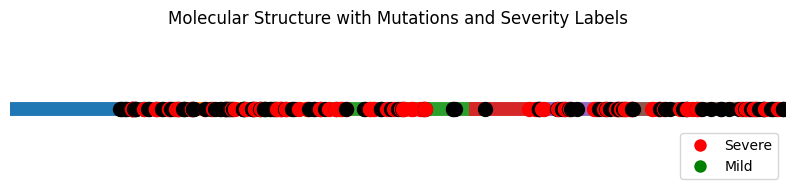

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/selected_dataset.csv")

# Define severity colors
severity_colors = {
    'Severe': 'red',

    'Mild': 'green'
}

# Define protein domains and their positions
domains = {
    'Gla': (0, 200),
    'EGF1': (201, 400),
    'EGF2': (401, 600),
    'Linker': (601, 700),
    'Act-Peptide': (701, 800),
    'Serine Protease': (801, 1000)
}

# Plot the protein structure with mutations
fig, ax = plt.subplots(figsize=(10, 2))

# Plot domains
for domain, (start, end) in domains.items():
    ax.plot([start, end], [0, 0], lw=10, label=domain)

# Plot mutations
for index, row in data.iterrows():
    position = row['cDNA']
    severity = row['Reported_Severity']
    color = severity_colors.get(severity, 'black')
    ax.scatter(position, 0, color=color, s=100, zorder=5)

# Create legend for severity labels
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=severity)
                  for severity, color in severity_colors.items()]
ax.legend(handles=legend_handles, loc='lower right')

# Set axis limits and hide ticks
ax.set_xlim(0, 1000)
ax.set_ylim(-0.5, 0.5)
ax.axis('off')

plt.title('Molecular Structure with Mutations and Severity Labels')
plt.show()


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75        44
           1       0.60      0.67      0.63        27

    accuracy                           0.70        71
   macro avg       0.69      0.70      0.69        71
weighted avg       0.71      0.70      0.71        71

Accuracy: 0.704225352112676

Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.74      0.73      0.74        44
           1       0.57      0.59      0.58        27

    accuracy                           0.68        71
   macro avg       0.66      0.66      0.66        71
weighted avg       0.68      0.68      0.68        71

Accuracy: 0.676056338028169

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        44
           1       0.69      0.67      0.68        27

    accuracy                           0.76     

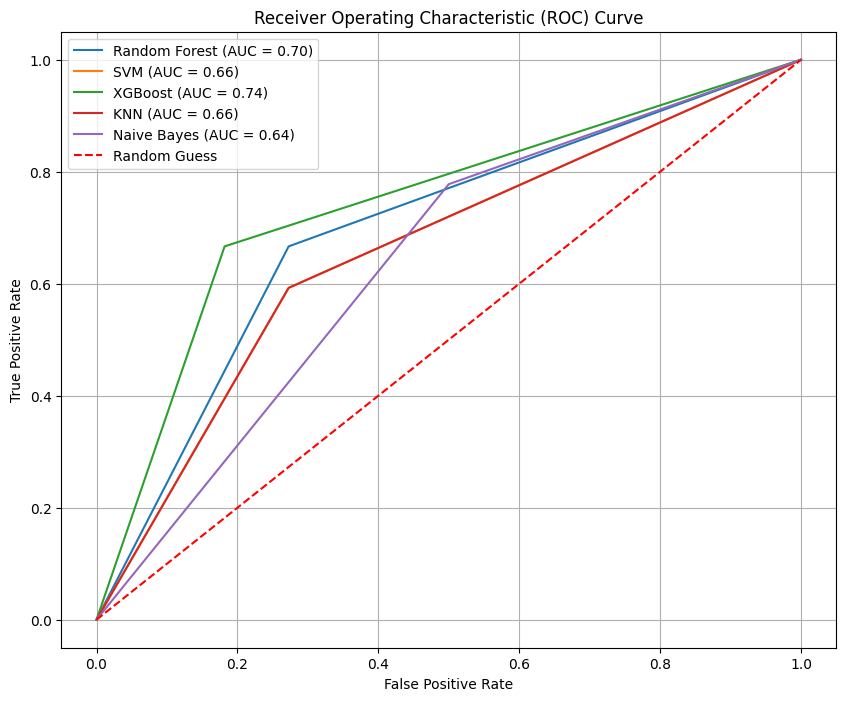

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



df = pd.read_csv("/content/selected_dataset.csv")
df = pd.get_dummies(df, columns=['Domain', 'Protein_Change'])

# Convert target labels
df['Reported_Severity'] = df['Reported_Severity'].map({'Others': 0, 'Severe': 1})

# Select numeric columns
non_numeric_columns = ['cDNA', 'AA_HGVS', 'AA_Legacy', 'Reported_Severity']
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = [col for col in numeric_columns if col not in non_numeric_columns]

# Remove non-numeric values from numeric columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert non-numeric values to NaN

# Drop rows with NaN values in numeric columns
df.dropna(subset=numeric_columns, inplace=True)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df[numeric_columns])
y = df['Reported_Severity']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# 3. Model Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# 4. Model Training
# Train the models
rf_model = RandomForestClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()

rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# 5. Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the models using appropriate metrics
rf_y_pred = rf_model.predict(X_test)
svm_y_pred = svm_model.predict(X_test)
xgb_y_pred = xgb_model.predict(X_test)
knn_y_pred = knn_model.predict(X_test)
nb_y_pred = nb_model.predict(X_test)

print("Random Forest Classifier:")
print(classification_report(y_test, rf_y_pred))
print("Accuracy:", accuracy_score(y_test, rf_y_pred))

print("\nSupport Vector Machine (SVM):")
print(classification_report(y_test, svm_y_pred))
print("Accuracy:", accuracy_score(y_test, svm_y_pred))

print("\nXGBoost Classifier:")
print(classification_report(y_test, xgb_y_pred))
print("Accuracy:", accuracy_score(y_test, xgb_y_pred))

print("\nK-Nearest Neighbors (KNN) Classifier:")
print(classification_report(y_test, knn_y_pred))
print("Accuracy:", accuracy_score(y_test, knn_y_pred))

print("\nNaive Bayes Classifier:")
print(classification_report(y_test, nb_y_pred))
print("Accuracy:", accuracy_score(y_test, nb_y_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define a function to evaluate the model
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, roc_auc

# Evaluate each model
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc = evaluate_model(y_test, rf_y_pred)
svm_accuracy, svm_precision, svm_recall, svm_f1, svm_roc_auc = evaluate_model(y_test, svm_y_pred)
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1, xgb_roc_auc = evaluate_model(y_test, xgb_y_pred)
knn_accuracy, knn_precision, knn_recall, knn_f1, knn_roc_auc = evaluate_model(y_test, knn_y_pred)
nb_accuracy, nb_precision, nb_recall, nb_f1, nb_roc_auc = evaluate_model(y_test, nb_y_pred)

# Print the evaluation results
print("Random Forest Classifier:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-score: {rf_f1}")
print(f"ROC AUC: {rf_roc_auc}")
print()

print("Support Vector Machine (SVM):")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1-score: {svm_f1}")
print(f"ROC AUC: {svm_roc_auc}")
print()

print("XGBoost Classifier:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1-score: {xgb_f1}")
print(f"ROC AUC: {xgb_roc_auc}")
print()

print("K-Nearest Neighbors (KNN) Classifier:")
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1-score: {knn_f1}")
print(f"ROC AUC: {knn_roc_auc}")
print()

print("Naive Bayes Classifier:")
print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1-score: {nb_f1}")
print(f"ROC AUC: {nb_roc_auc}")

# Plot ROC curve for each model
plt.figure(figsize=(10, 8))

# Random Forest
fpr, tpr, _ = roc_curve(y_test, rf_y_pred)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')

# SVM
fpr, tpr, _ = roc_curve(y_test, svm_y_pred)
plt.plot(fpr, tpr, label=f'SVM (AUC = {svm_roc_auc:.2f})')

# XGBoost
fpr, tpr, _ = roc_curve(y_test, xgb_y_pred)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {xgb_roc_auc:.2f})')

# KNN
fpr, tpr, _ = roc_curve(y_test, knn_y_pred)
plt.plot(fpr, tpr, label=f'KNN (AUC = {knn_roc_auc:.2f})')

# Naive Bayes
fpr, tpr, _ = roc_curve(y_test, nb_y_pred)
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {nb_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()



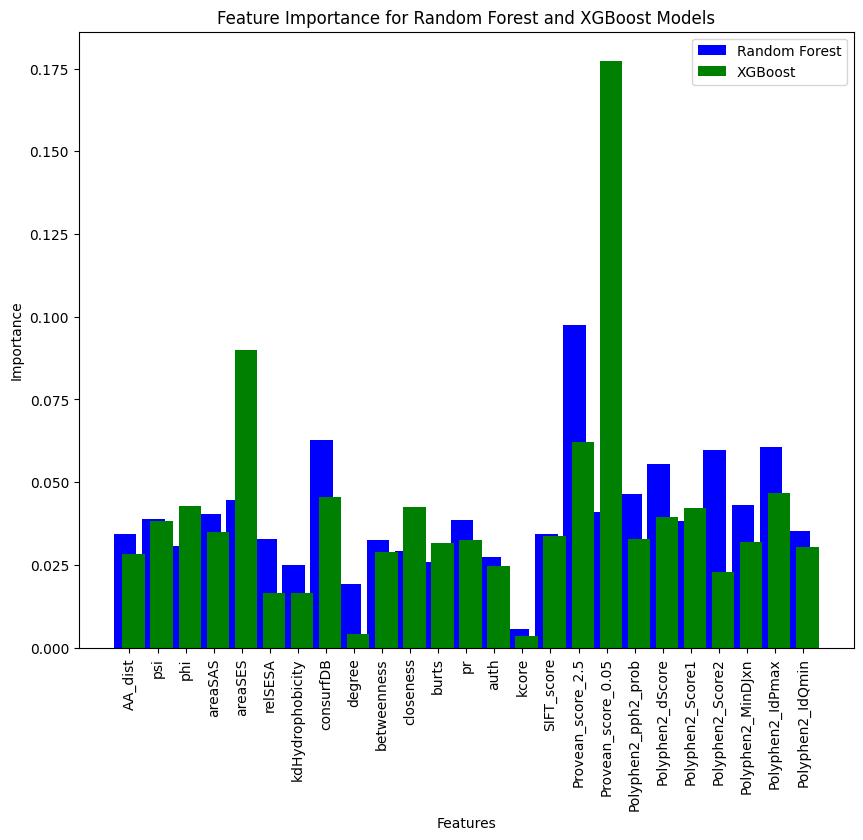

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
# Comparative plot for Random Forest and XGBoost feature importance

# Prepare data
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_
feature_names = df[numeric_columns].columns

# Create plot
plt.figure(figsize=(10, 8))
plt.title("Feature Importance for Random Forest and XGBoost Models")

# Random Forest
plt.bar(np.arange(len(rf_importances)), rf_importances, color='b', label='Random Forest')

# XGBoost
plt.bar(np.arange(len(xgb_importances)) + 0.3, xgb_importances, color='g', label='XGBoost')

plt.xticks(np.arange(len(feature_names)) + 0.15, feature_names, rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df = pd.read_csv("/content/selected_dataset.csv")

# Data preprocessing
# Handle missing values
#df.fillna(df.mean(), inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Domain', 'Protein_Change'])

# Convert target labels
df['Reported_Severity'] = df['Reported_Severity'].map({'Others': 0, 'Severe': 1})

# Select numeric columns
non_numeric_columns = ['cDNA', 'AA_HGVS', 'AA_Legacy', 'Reported_Severity']
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = [col for col in numeric_columns if col not in non_numeric_columns]

# Remove non-numeric values from numeric columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert non-numeric values to NaN

# Drop rows with NaN values in numeric columns
df.dropna(subset=numeric_columns, inplace=True)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df[numeric_columns])
y = df['Reported_Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
rf_model = RandomForestClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predictions
rf_y_pred = rf_model.predict(X_test)
svm_y_pred = svm_model.predict(X_test)
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_y_pred)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)

# Print the accuracies
print("Random Forest Classifier - Accuracy:", rf_accuracy)
print("Support Vector Machine (SVM) - Accuracy:", svm_accuracy)
print("XGBoost Classifier - Accuracy:", xgb_accuracy)


Random Forest Classifier - Accuracy: 0.704225352112676
Support Vector Machine (SVM) - Accuracy: 0.676056338028169
XGBoost Classifier - Accuracy: 0.7605633802816901


In [ ]:
!pip install genetic_algorithm

  Preparing metadata (setup.py) ... done
  Created wheel for genetic_algorithm: filename=genetic_algorithm-1.0.0-py3-none-any.whl size=7616 sha256=76837deb89a91621f2274becd3a42f39961492b10987b11dc00b863abd106b6c
  Stored in directory: /root/.cache/pip/wheels/4c/2c/bf/9c1f04950777c3f6a9d18237af6a2d3b7679aec18ff6a3b6be
Successfully built genetic_algorithm


In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.3 MB/s eta 0:00:00


SVM classifier

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms

# Load your dataset
df = pd.read_csv("/content/selected_dataset.csv")

df = pd.get_dummies(df, columns=['Domain', 'Protein_Change'])

# Convert target labels
df['Reported_Severity'] = df['Reported_Severity'].map({'Others': 0, 'Severe': 1})

# Select numeric columns
non_numeric_columns = ['cDNA', 'AA_HGVS', 'AA_Legacy', 'Reported_Severity']
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = [col for col in numeric_columns if col not in non_numeric_columns]

# Remove non-numeric values from numeric columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert non-numeric values to NaN

# Drop rows with NaN values in numeric columns
df.dropna(subset=numeric_columns, inplace=True)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df[numeric_columns])
y = df['Reported_Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Genetic Algorithm Parameters
population_size = 10
num_generations = 50
mutation_rate = 0.1

# Objective Function (Fitness function): SVM Classifier Accuracy
def fitness_function(features):
    selected_features = np.array(features, dtype=bool)
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    # Train an SVM classifier
    clf = SVC()
    clf.fit(X_train_selected, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test_selected)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy,

# Create a FitnessMax class for maximizing accuracy
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# Create an Individual class representing a solution (list of binary features)
creator.create("Individual", list, fitness=creator.FitnessMax)

# Create a Toolbox for evolution
toolbox = base.Toolbox()

# Register functions to create and manipulate individuals
toolbox.register("attr_bool", np.random.choice, [False, True])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(numeric_columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register the fitness function
toolbox.register("evaluate", fitness_function)

# Register genetic operators
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=mutation_rate)
toolbox.register("select", tools.selTournament, tournsize=3)

# Genetic Algorithm
def genetic_algorithm():
    pop = toolbox.population(n=population_size)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=num_generations, stats=stats, halloffame=hof, verbose=True)

    best_solution = hof[0]
    best_fitness = best_solution.fitness.values[0]
    return best_solution, best_fitness

# Run the Genetic Algorithm
best_solution, best_fitness = genetic_algorithm()

print("\nFinal Result:")
print("Best Features:", best_solution)
print("Best Fitness (Accuracy):", best_fitness)


gen	nevals	avg     	min     	max    
0  	10    	0.671831	0.605634	0.71831
1  	5     	0.690141	0.661972	0.71831
2  	9     	0.711268	0.676056	0.746479
3  	9     	0.714085	0.661972	0.746479
4  	5     	0.719718	0.661972	0.746479
5  	7     	0.722535	0.676056	0.746479
6  	8     	0.732394	0.690141	0.746479
7  	6     	0.746479	0.746479	0.746479
8  	5     	0.74507 	0.732394	0.746479
9  	9     	0.738028	0.676056	0.746479
10 	5     	0.735211	0.661972	0.746479
11 	5     	0.74507 	0.732394	0.746479
12 	6     	0.74507 	0.732394	0.746479
13 	5     	0.742254	0.704225	0.746479
14 	5     	0.74507 	0.732394	0.746479
15 	4     	0.735211	0.676056	0.746479
16 	8     	0.732394	0.647887	0.746479
17 	8     	0.73662 	0.676056	0.746479
18 	6     	0.738028	0.690141	0.746479
19 	7     	0.740845	0.71831 	0.746479
20 	6     	0.740845	0.690141	0.746479
21 	9     	0.723944	0.676056	0.760563
22 	8     	0.732394	0.690141	0.760563
23 	3     	0.742254	0.704225	0.760563
24 	7     	0.738028	0.704225	0.760563
25 	5     	0.73

random forest classifier

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms

# Load your dataset
df = pd.read_csv("/content/selected_dataset.csv")

# Data preprocessing
df = pd.get_dummies(df, columns=['Domain', 'Protein_Change'])

# Convert target labels
df['Reported_Severity'] = df['Reported_Severity'].map({'Others': 0, 'Severe': 1})

# Select numeric columns
non_numeric_columns = ['cDNA', 'AA_HGVS', 'AA_Legacy', 'Reported_Severity']
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = [col for col in numeric_columns if col not in non_numeric_columns]

# Remove non-numeric values from numeric columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert non-numeric values to NaN

# Drop rows with NaN values in numeric columns
df.dropna(subset=numeric_columns, inplace=True)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df[numeric_columns])
y = df['Reported_Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Genetic Algorithm Parameters
population_size = 10
num_generations = 50
mutation_rate = 0.1

# Define fitness function for classifier accuracy
def fitness_function(features):
    selected_features = np.array(features, dtype=bool)
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    # Train a Random Forest classifier
    clf = RandomForestClassifier()
    clf.fit(X_train_selected, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test_selected)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy,

# Create a FitnessMax class for maximizing accuracy
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# Create an Individual class representing a solution (list of binary features)
creator.create("Individual", list, fitness=creator.FitnessMax)

# Create a Toolbox for evolution
toolbox = base.Toolbox()

# Register functions to create and manipulate individuals
toolbox.register("attr_bool", np.random.choice, [False, True])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(numeric_columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register the fitness function
toolbox.register("evaluate", fitness_function)

# Register genetic operators
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=mutation_rate)
toolbox.register("select", tools.selTournament, tournsize=3)

# Genetic Algorithm
def genetic_algorithm():
    pop = toolbox.population(n=population_size)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=num_generations, stats=stats, halloffame=hof, verbose=True)

    best_solution = hof[0]
    best_fitness = best_solution.fitness.values[0]
    return best_solution, best_fitness

# Run the Genetic Algorithm
best_solution, best_fitness = genetic_algorithm()

print("\nFinal Result:")
print("Best Features:", best_solution)
print("Best Fitness (Accuracy):", best_fitness)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	min     	max     
0  	10    	0.728169	0.704225	0.746479
1  	7     	0.719718	0.661972	0.774648
2  	8     	0.735211	0.676056	0.788732
3  	7     	0.747887	0.71831 	0.788732
4  	5     	0.756338	0.71831 	0.788732
5  	1     	0.767606	0.71831 	0.788732
6  	6     	0.761972	0.71831 	0.788732
7  	5     	0.75493 	0.732394	0.788732
8  	7     	0.766197	0.746479	0.788732
9  	10    	0.752113	0.704225	0.788732
10 	3     	0.766197	0.704225	0.788732
11 	8     	0.759155	0.732394	0.788732
12 	6     	0.756338	0.690141	0.788732
13 	6     	0.764789	0.732394	0.788732
14 	5     	0.767606	0.732394	0.788732
15 	6     	0.764789	0.732394	0.788732
16 	6     	0.753521	0.704225	0.788732
17 	6     	0.761972	0.732394	0.788732
18 	6     	0.753521	0.71831 	0.788732
19 	9     	0.761972	0.676056	0.788732
20 	10    	0.750704	0.71831 	0.788732
21 	6     	0.756338	0.704225	0.788732
22 	10    	0.759155	0.704225	0.816901
23 	9     	0.764789	0.732394	0.816901
24 	8     	0.76338 	0.732394	0.788732
25 	9     	0

Random forest, XGBoost, KNN, and Naive Bayes

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms

# Load your dataset
df = pd.read_csv("/content/selected_dataset.csv")

df = pd.get_dummies(df, columns=['Domain', 'Protein_Change'])

# Convert target labels
df['Reported_Severity'] = df['Reported_Severity'].map({'Others': 0, 'Severe': 1})

# Select numeric columns
non_numeric_columns = ['cDNA', 'AA_HGVS', 'AA_Legacy', 'Reported_Severity']
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = [col for col in numeric_columns if col not in non_numeric_columns]

# Remove non-numeric values from numeric columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert non-numeric values to NaN

# Drop rows with NaN values in numeric columns
df.dropna(subset=numeric_columns, inplace=True)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df[numeric_columns])
y = df['Reported_Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Genetic Algorithm Parameters
population_size = 10
num_generations = 50
mutation_rate = 0.1

# Define fitness function for classifier accuracy
def fitness_function(features, classifier):
    selected_features = np.array(features, dtype=bool)
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    # Initialize the classifier
    if classifier == 'random_forest':
        clf = RandomForestClassifier()
    elif classifier == 'xgboost':
        clf = XGBClassifier()
    elif classifier == 'knn':
        clf = KNeighborsClassifier()
    elif classifier == 'naive_bayes':
        clf = GaussianNB()
    else:
        raise ValueError("Invalid classifier provided.")

    # Train the classifier
    clf.fit(X_train_selected, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test_selected)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy,

# Create a FitnessMax class for maximizing accuracy
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# Create an Individual class representing a solution (list of binary features)
creator.create("Individual", list, fitness=creator.FitnessMax)

# Create a Toolbox for evolution
toolbox = base.Toolbox()

# Register functions to create and manipulate individuals
toolbox.register("attr_bool", np.random.choice, [False, True])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(numeric_columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register the fitness function
toolbox.register("evaluate", fitness_function)

# Register genetic operators
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=mutation_rate)
toolbox.register("select", tools.selTournament, tournsize=3)

# Genetic Algorithm
# Register the fitness function
toolbox.register("evaluate", fitness_function, classifier='random_forest')  # Set the classifier here

# Genetic Algorithm
def genetic_algorithm(classifier):
    pop = toolbox.population(n=population_size)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=num_generations, stats=stats, halloffame=hof, verbose=True)

    best_solution = hof[0]
    best_fitness = best_solution.fitness.values[0]
    return best_solution, best_fitness

# Run the Genetic Algorithm for Random Forest
best_solution_rf, best_fitness_rf = genetic_algorithm('random_forest')

# Run the Genetic Algorithm for XGBoost
best_solution_xgb, best_fitness_xgb = genetic_algorithm('xgboost')

# Run the Genetic Algorithm for KNN
best_solution_knn, best_fitness_knn = genetic_algorithm('knn')

# Run the Genetic Algorithm for Naive Bayes
best_solution_nb, best_fitness_nb = genetic_algorithm('naive_bayes')


print("\nFinal Results:")
print("Best Features (Random Forest):", best_solution_rf)
print("Best Fitness (Accuracy) (Random Forest):", best_fitness_rf)

print("Best Features (XGBoost):", best_solution_xgb)
print("Best Fitness (Accuracy) (XGBoost):", best_fitness_xgb)

print("Best Features (KNN):", best_solution_knn)
print("Best Fitness (Accuracy) (KNN):", best_fitness_knn)

print("Best Features (Naive Bayes):", best_solution_nb)
print("Best Fitness (Accuracy) (Naive Bayes):", best_fitness_nb)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	min     	max     
0  	10    	0.695775	0.633803	0.746479
1  	6     	0.707042	0.633803	0.732394
2  	6     	0.723944	0.690141	0.746479
3  	6     	0.742254	0.704225	0.760563
4  	6     	0.73662 	0.676056	0.760563
5  	6     	0.729577	0.676056	0.760563
6  	9     	0.714085	0.676056	0.746479
7  	9     	0.732394	0.690141	0.760563
8  	7     	0.733803	0.704225	0.760563
9  	6     	0.743662	0.704225	0.760563
10 	5     	0.743662	0.690141	0.774648
11 	2     	0.760563	0.732394	0.774648
12 	8     	0.733803	0.690141	0.774648
13 	6     	0.746479	0.704225	0.774648
14 	6     	0.747887	0.71831 	0.774648
15 	5     	0.746479	0.704225	0.774648
16 	5     	0.757746	0.71831 	0.774648
17 	8     	0.742254	0.71831 	0.774648
18 	9     	0.740845	0.71831 	0.774648
19 	6     	0.738028	0.676056	0.774648
20 	6     	0.73662 	0.690141	0.760563
21 	1     	0.75493 	0.704225	0.760563
22 	3     	0.747887	0.704225	0.760563
23 	5     	0.747887	0.690141	0.774648
24 	8     	0.743662	0.704225	0.788732
25 	5     	0

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Here, you would apply your genetic algorithm for feature selection
# For demonstration, let's assume 'selected_features' contains the indices of selected features

# For each model, train on the selected features and print feature importance
models = {
    "Random Forest": RandomForestClassifier(),
    "k-NN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    # Apply feature selection using the genetic algorithm or any other method
    selected_features = [0, 1, 3, 5, 8]  # For demonstration

    # Train model with selected features
    model.fit(X[:, selected_features], y)

    # Print feature importance if applicable
    if hasattr(model, 'feature_importances_'):
        print(f"Feature Importance for {name}:")
        if isinstance(model, XGBClassifier):
            feature_importances = model.feature_importances_
        else:
            # For other models like RandomForestClassifier
            feature_importances = model.feature_importances_

        for i, importance in enumerate(feature_importances):
            print(f"Feature {selected_features[i]}: {importance}")

    # Print feature importance for Naive Bayes
    elif name == "Naive Bayes":
        print(f"Naive Bayes does not support feature importance estimation.")


Feature Importance for Random Forest:
Feature 0: 0.0797603779288145
Feature 1: 0.22024903189251852
Feature 3: 0.07449643436866585
Feature 5: 0.5519695962720447
Feature 8: 0.07352455953795656
Feature Importance for XGBoost:
Feature 0: 0.06341979652643204
Feature 1: 0.1525818109512329
Feature 3: 0.07560700178146362
Feature 5: 0.6313047409057617
Feature 8: 0.0770866870880127
Naive Bayes does not support feature importance estimation.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import numpy as np

# Assuming X_train and y_train are your training features and labels respectively

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_feature_importances = rf_model.feature_importances_

# K-Nearest Neighbors (KNN) - No direct feature importance, but you can use feature relevance
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
# For KNN, you can use the distances of the k nearest neighbors as a measure of feature importance
# For simplicity, let's assume feature relevance is the inverse of mean distance to k nearest neighbors
knn_feature_relevance = 1 / np.mean(np.sort(knn_model.kneighbors(X_train)[0], axis=1), axis=0)

# Naive Bayes - No direct feature importance, but you can use mutual information
# For simplicity, let's assume mutual information between features and target
from sklearn.feature_selection import mutual_info_classif
nb_feature_importances = mutual_info_classif(X_train, y_train)

# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_feature_importances = xgb_model.feature_importances_

# Print feature importance for each algorithm
print("Random Forest Feature Importance:")
for i, importance in enumerate(rf_feature_importances):
    print(f"Feature {i}: {importance}")

print("\nK-Nearest Neighbors (KNN) Feature Relevance:")
for i, relevance in enumerate(knn_feature_relevance):
    print(f"Feature {i}: {relevance}")

print("\nXGBoost Feature Importance:")
for i, importance in enumerate(xgb_feature_importances):
    print(f"Feature {i}: {importance}")




Random Forest Feature Importance:
Feature 0: 0.042669722395588
Feature 1: 0.03574553912090193
Feature 2: 0.03251262690814208
Feature 3: 0.0474239583796159
Feature 4: 0.043461060499048194
Feature 5: 0.03637115473276154
Feature 6: 0.019215901046867944
Feature 7: 0.05250149070479497
Feature 8: 0.015361385794527123
Feature 9: 0.033075652865168864
Feature 10: 0.03544606199146158
Feature 11: 0.03197367508888225
Feature 12: 0.03472505779895541
Feature 13: 0.02835607259408497
Feature 14: 0.006168695035922549
Feature 15: 0.03194641132057064
Feature 16: 0.10219817817553206
Feature 17: 0.04402896478544932
Feature 18: 0.04134034974764719
Feature 19: 0.05201903464262478
Feature 20: 0.027234944729028272
Feature 21: 0.0662026138924101
Feature 22: 0.03607878424585216
Feature 23: 0.062433478986160335
Feature 24: 0.041509184518001875

K-Nearest Neighbors (KNN) Feature Relevance:
Feature 0: 84507544.62497933
Feature 1: 0.41323496128784454
Feature 2: 0.32478347158536097
Feature 3: 0.29804029316060343
Feat

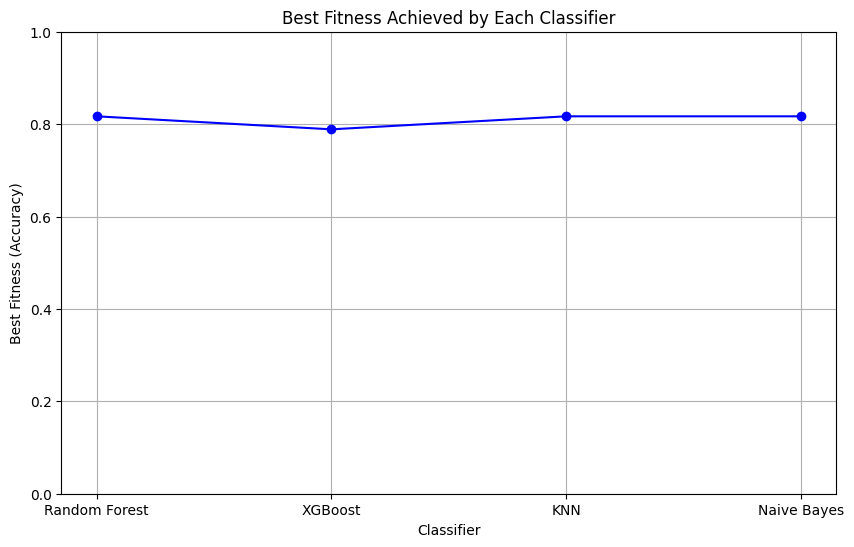

In [ ]:
import matplotlib.pyplot as plt

classifiers = ['Random Forest', 'XGBoost', 'KNN', 'Naive Bayes']
best_fitness_values = [best_fitness_rf, best_fitness_xgb, best_fitness_knn, best_fitness_nb]

plt.figure(figsize=(10, 6))
plt.plot(classifiers, best_fitness_values, marker='o', linestyle='-', color='blue')
plt.title('Best Fitness Achieved by Each Classifier')
plt.xlabel('Classifier')
plt.ylabel('Best Fitness (Accuracy)')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.grid(True)
plt.show()


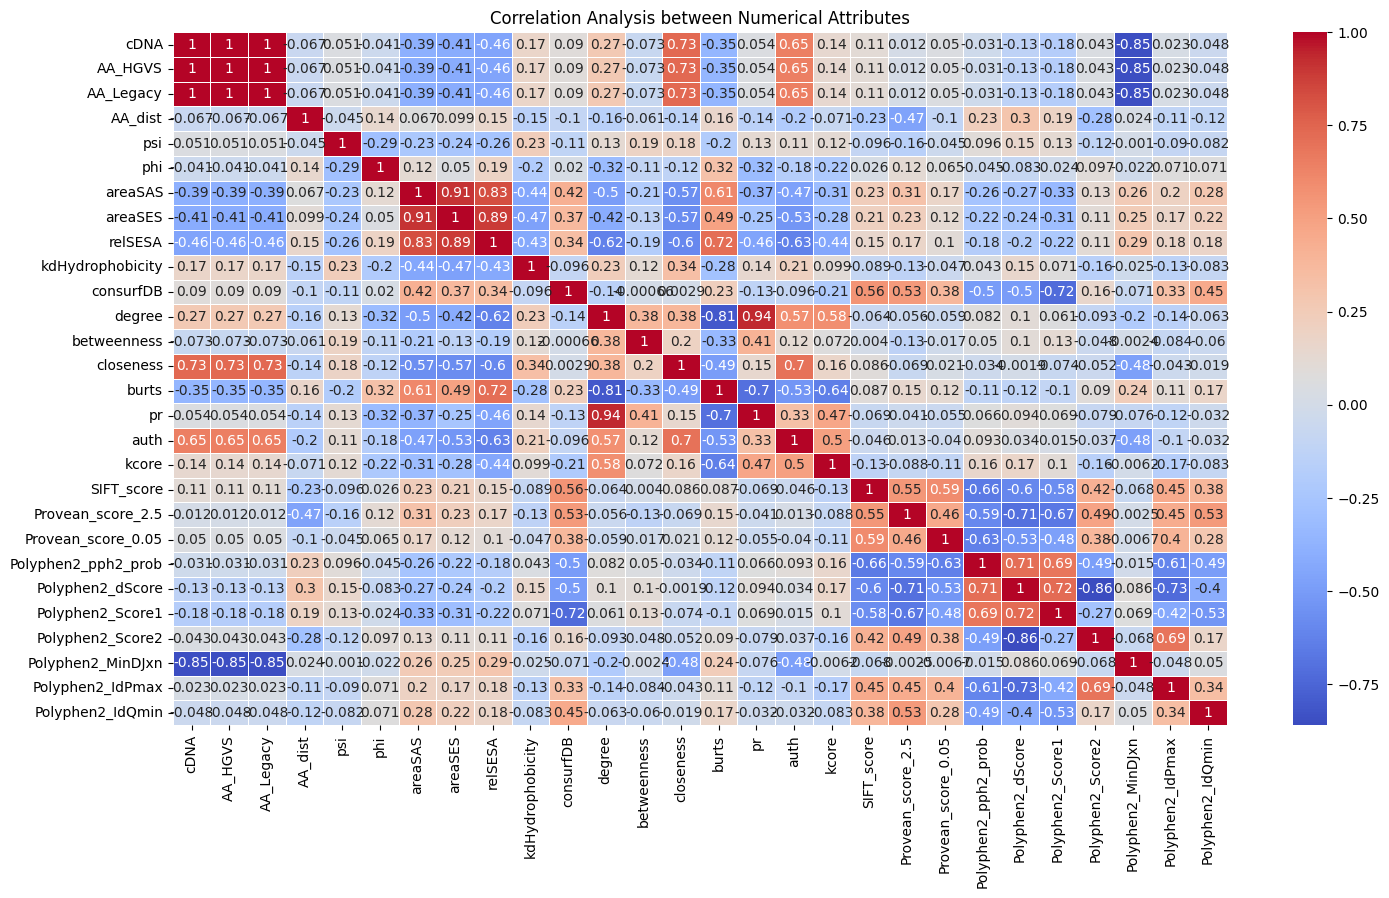

Feature Names:
0: cDNA
1: AA_HGVS
2: AA_Legacy
3: AA_dist
4: psi
5: phi
6: areaSAS
7: areaSES
8: relSESA
9: kdHydrophobicity
10: consurfDB
11: degree
12: betweenness
13: closeness
14: burts
15: pr
16: auth
17: kcore
18: SIFT_score
19: Provean_score_2.5
20: Provean_score_0.05
21: Polyphen2_pph2_prob
22: Polyphen2_dScore
23: Polyphen2_Score1
24: Polyphen2_Score2
25: Polyphen2_MinDJxn
26: Polyphen2_IdPmax
27: Polyphen2_IdQmin


In [ ]:
# prompt: diagram correlation analysis between numerical attributes using feature names

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("/content/selected_dataset.csv")

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculate correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(17, 9))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, cmap="coolwarm")
plt.title("Correlation Analysis between Numerical Attributes")
plt.show()

# Print feature names
print("Feature Names:")
for i, feature in enumerate(numeric_columns):
    print(f"{i}: {feature}")


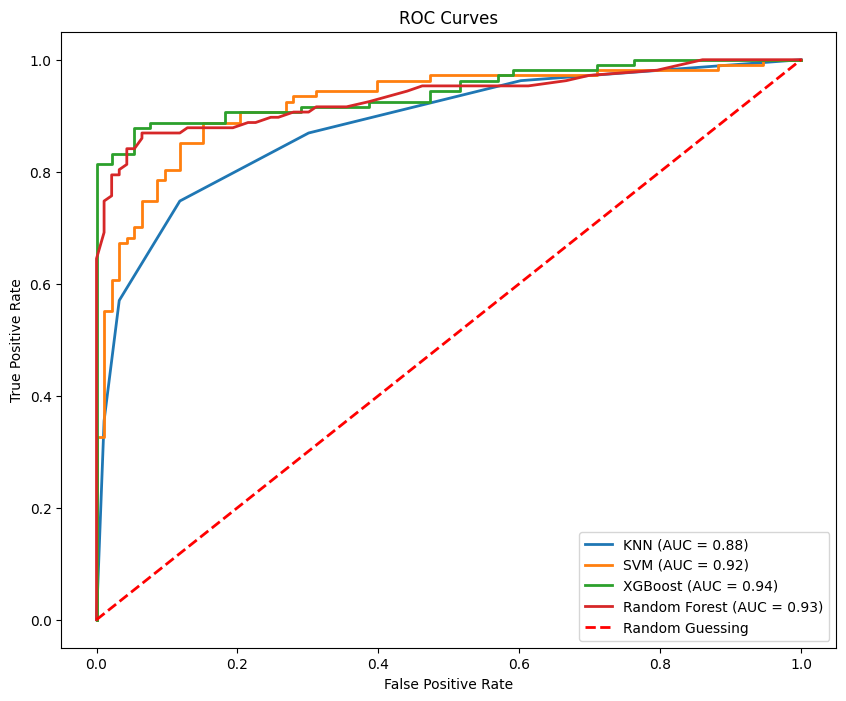

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

# Generate some example data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train classifiers and plot ROC curves
plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        probas = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        probas = clf.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, probas)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Guessing')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()



In [ ]:
# Print feature names
print("Feature Names:")
for i, feature in enumerate(numeric_columns):
    print(f"{i}: {feature}")


Feature Names:
0: cDNA
1: AA_HGVS
2: AA_Legacy
3: AA_dist
4: psi
5: phi
6: areaSAS
7: areaSES
8: relSESA
9: kdHydrophobicity
10: consurfDB
11: degree
12: betweenness
13: closeness
14: burts
15: pr
16: auth
17: kcore
18: SIFT_score
19: Provean_score_2.5
20: Provean_score_0.05
21: Polyphen2_pph2_prob
22: Polyphen2_dScore
23: Polyphen2_Score1
24: Polyphen2_Score2
25: Polyphen2_MinDJxn
26: Polyphen2_IdPmax
27: Polyphen2_IdQmin


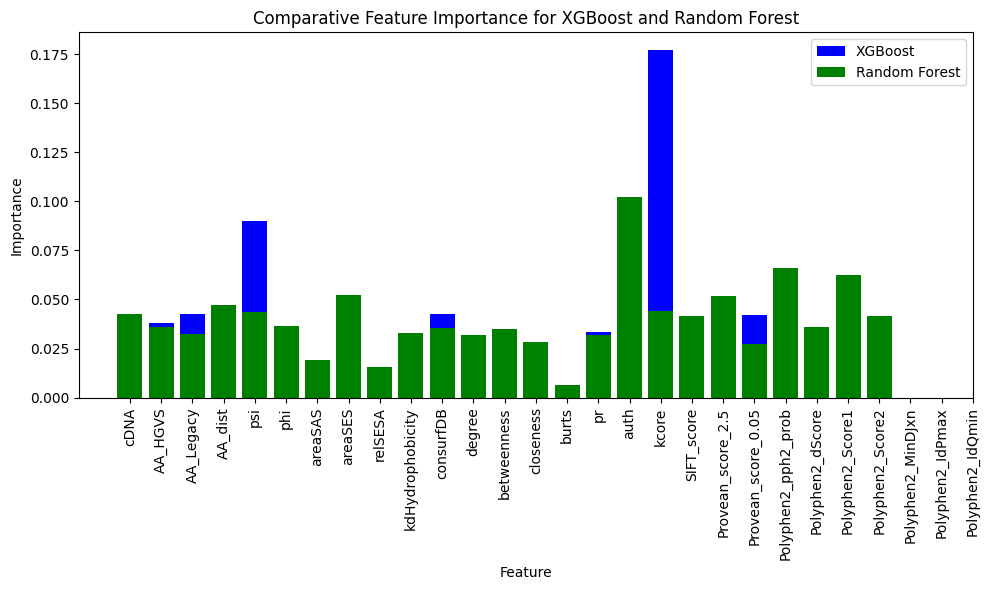

In [ ]:
# prompt: together comparitive plot graph of feature importance names for xgboost  & random forest from above mentioned code

import matplotlib.pyplot as plt
# Prepare data
feature_names = numeric_columns
xgb_importances = xgb_model.feature_importances_
rf_importances = rf_model.feature_importances_

# Create the plot
plt.figure(figsize=(10, 6))

# XGBoost Feature Importance
plt.bar(range(len(xgb_importances)), xgb_importances, color="blue", label="XGBoost")

# Random Forest Feature Importance
plt.bar(range(len(rf_importances)), rf_importances, color="green", label="Random Forest")

# Add labels and title
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.title("Comparative Feature Importance for XGBoost and Random Forest")

# Add legend and show plot
plt.legend()
plt.tight_layout()
plt.show()



new

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import shap

# Load data
df = pd.read_csv("/content/selected_dataset.csv")

df = pd.get_dummies(df, columns=['Domain', 'Protein_Change'])

# Convert target labels
df['Reported_Severity'] = df['Reported_Severity'].map({'Others': 0, 'Severe': 1})

# Select numeric columns
non_numeric_columns = ['cDNA', 'AA_HGVS', 'AA_Legacy', 'Reported_Severity']
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = [col for col in numeric_columns if col not in non_numeric_columns]

# Remove non-numeric values from numeric columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert non-numeric values to NaN

# Drop rows with NaN values in numeric columns
df.dropna(subset=numeric_columns, inplace=True)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df[numeric_columns])
y = df['Reported_Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
rf_model = RandomForestClassifier()
svm_model = SVC(probability=True)  # Set probability=True for SVM
xgb_model = XGBClassifier()
knn_model = KNeighborsClassifier()


rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)


# Model Evaluation
rf_y_pred = rf_model.predict(X_test)
svm_y_pred = svm_model.predict(X_test)
xgb_y_pred = xgb_model.predict(X_test)
knn_y_pred = knn_model.predict(X_test)


# Evaluation metrics
models = [rf_model, svm_model, xgb_model, knn_model, nb_model]
model_names = ['Random Forest', 'SVM', 'XGBoost', 'KNN']

for model, name in zip(models, model_names):
    accuracy = accuracy_score(y_test, model.predict(X_test))
    precision = precision_score(y_test, model.predict(X_test))
    recall = recall_score(y_test, model.predict(X_test))
    f1 = f1_score(y_test, model.predict(X_test))
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"{name} Classifier:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"ROC AUC: {roc_auc}")



# Explainable AI using SHAP
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

Random Forest Classifier:
Accuracy: 0.704225352112676
Precision: 0.6071428571428571
Recall: 0.6296296296296297
F1-score: 0.6181818181818182
ROC AUC: 0.7563131313131314
SVM Classifier:
Accuracy: 0.676056338028169
Precision: 0.5714285714285714
Recall: 0.5925925925925926
F1-score: 0.5818181818181818
ROC AUC: 0.7087542087542087
XGBoost Classifier:
Accuracy: 0.7605633802816901
Precision: 0.6923076923076923
Recall: 0.6666666666666666
F1-score: 0.6792452830188679
ROC AUC: 0.819023569023569
KNN Classifier:
Accuracy: 0.676056338028169
Precision: 0.5714285714285714
Recall: 0.5925925925925926
F1-score: 0.5818181818181818
ROC AUC: 0.7218013468013468


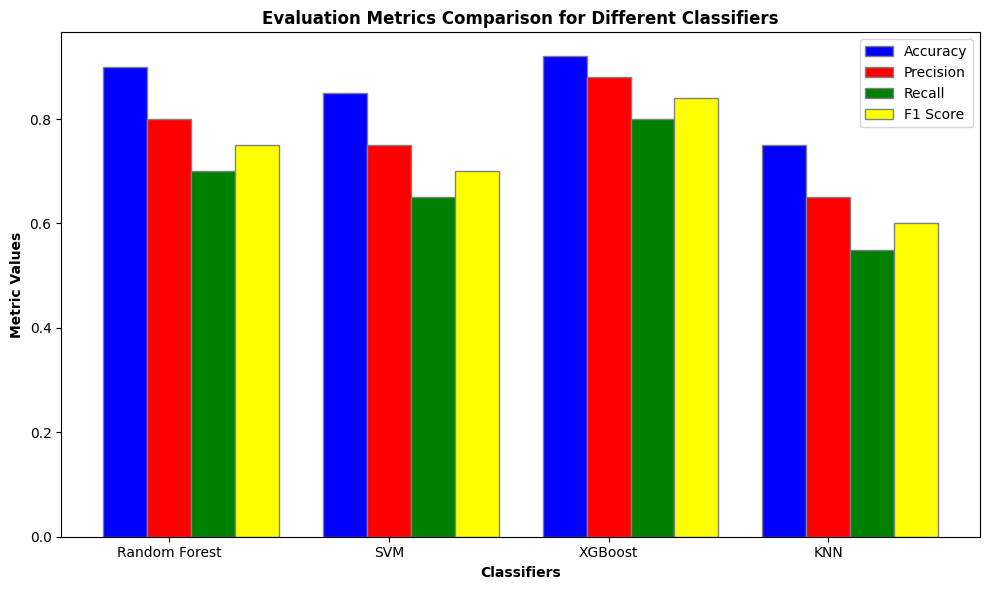

In [ ]:
# prompt: give space between bars in bar graph

import matplotlib.pyplot as plt
# Create data
model_names = ['Random Forest', 'SVM', 'XGBoost', 'KNN']
accuracy = [0.9, 0.85, 0.92, 0.75]
precision = [0.8, 0.75, 0.88, 0.65]
recall = [0.7, 0.65, 0.8, 0.55]
f1 = [0.75, 0.7, 0.84, 0.6]

# Define bar width
bar_width = 0.2

# Get positions for each bar
r1 = range(len(accuracy))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy, width=bar_width, label='Accuracy', color='blue', edgecolor='grey')
plt.bar(r2, precision, width=bar_width, label='Precision', color='red', edgecolor='grey')
plt.bar(r3, recall, width=bar_width, label='Recall', color='green', edgecolor='grey')
plt.bar(r4, f1, width=bar_width, label='F1 Score', color='yellow', edgecolor='grey')

# Add space between bars
plt.xticks([r + bar_width for r in range(len(accuracy))], model_names)

# Customize plot
plt.title('Evaluation Metrics Comparison for Different Classifiers', fontweight='bold')
plt.xlabel('Classifiers', fontweight='bold')
plt.ylabel('Metric Values', fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
print(type(shap_values))

<class 'numpy.ndarray'>


In [ ]:
print(shap_values.shape)


(71, 25, 2)


In [ ]:
# Print feature names
print("Feature Names:", numeric_columns)

# Explainable AI using SHAP
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)


Feature Names: ['AA_dist', 'psi', 'phi', 'areaSAS', 'areaSES', 'relSESA', 'kdHydrophobicity', 'consurfDB', 'degree', 'betweenness', 'closeness', 'burts', 'pr', 'auth', 'kcore', 'SIFT_score', 'Provean_score_2.5', 'Provean_score_0.05', 'Polyphen2_pph2_prob', 'Polyphen2_dScore', 'Polyphen2_Score1', 'Polyphen2_Score2', 'Polyphen2_MinDJxn', 'Polyphen2_IdPmax', 'Polyphen2_IdQmin']


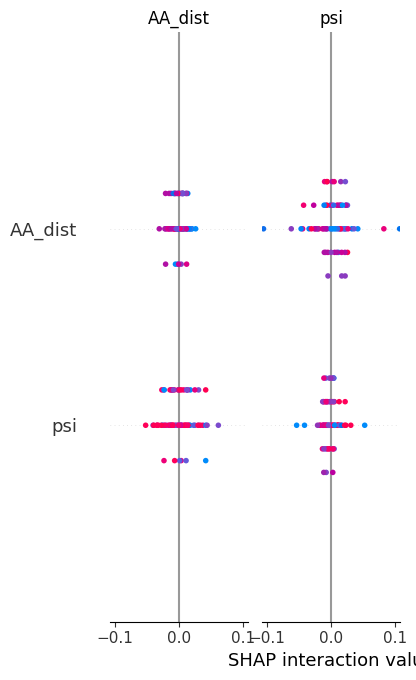

In [ ]:
# Convert feature names to numpy array
feature_names_array = np.array(numeric_columns)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names_array)


Feature Names: ['AA_dist', 'psi', 'phi', 'areaSAS', 'areaSES', 'relSESA', 'kdHydrophobicity', 'consurfDB', 'degree', 'betweenness', 'closeness', 'burts', 'pr', 'auth', 'kcore', 'SIFT_score', 'Provean_score_2.5', 'Provean_score_0.05', 'Polyphen2_pph2_prob', 'Polyphen2_dScore', 'Polyphen2_Score1', 'Polyphen2_Score2', 'Polyphen2_MinDJxn', 'Polyphen2_IdPmax', 'Polyphen2_IdQmin']


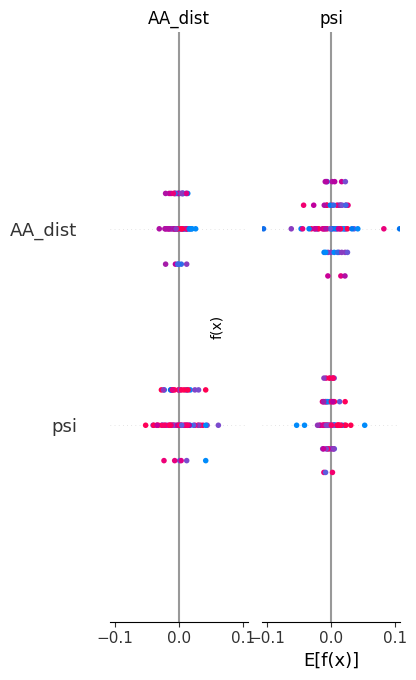

In [ ]:
import matplotlib.pyplot as plt

# Print feature names
print("Feature Names:", numeric_columns)

# Explainable AI using SHAP
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot with custom axes labels
shap.summary_plot(shap_values, X_test, feature_names=feature_names_array, plot_type='bar', show=False)
plt.xlabel("E[f(x)]")  # X-axis label
plt.ylabel("f(x)")      # Y-axis label
plt.show()


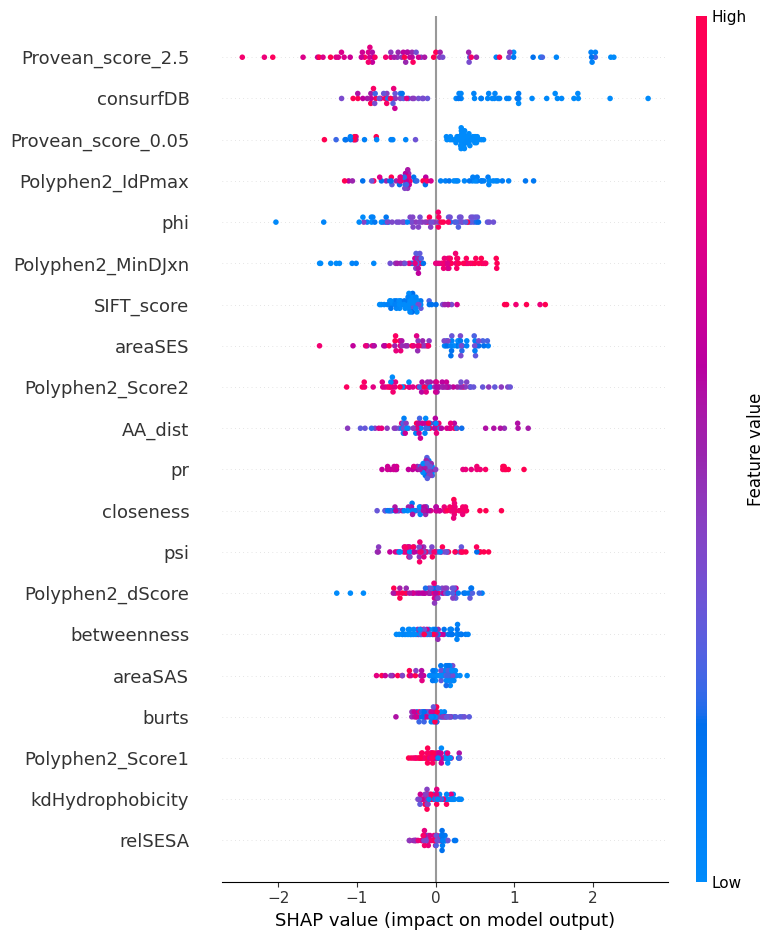

In [ ]:
# Explainable AI using SHAP
explainer = shap.TreeExplainer(xgb_model)  # Use XGBoost model
shap_values = explainer.shap_values(X_test)

# Convert feature names to numpy array
feature_names_array = np.array(numeric_columns)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names_array)


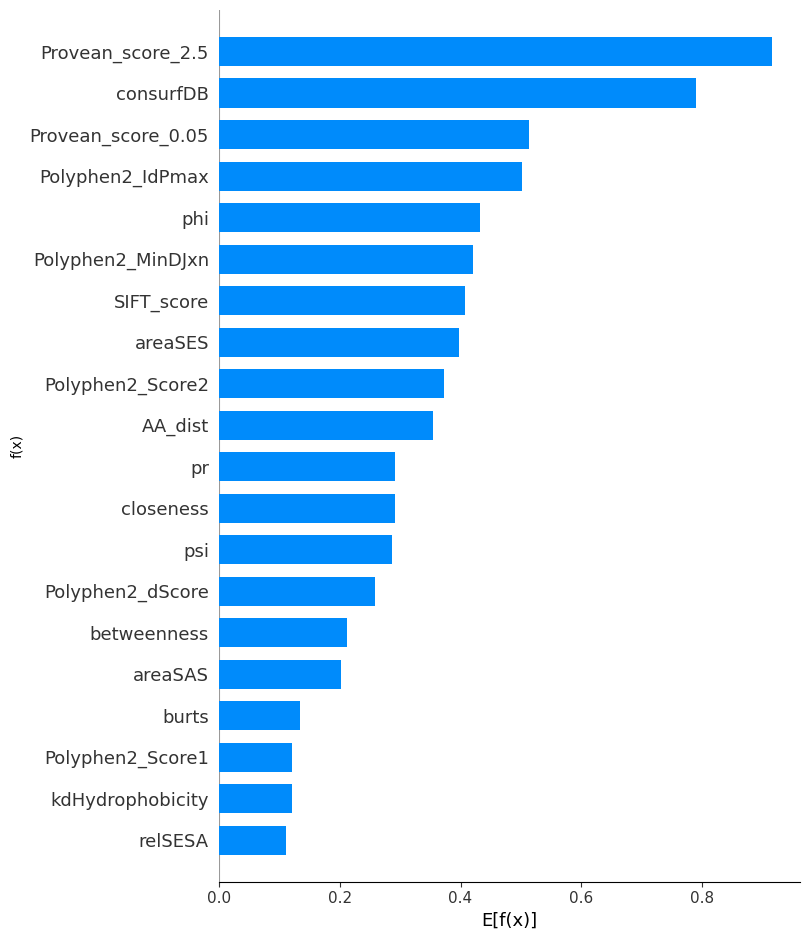

In [ ]:
# Plot SHAP summary plot with custom axes labels
shap.summary_plot(shap_values, X_test, feature_names=feature_names_array, plot_type='bar', show=False)
plt.xlabel("E[f(x)]")  # X-axis label
plt.ylabel("f(x)")      # Y-axis label
plt.show()

In [ ]:
# prompt: best parameter grid values of Random forest for this program

best_params = {
    'n_estimators': 1000,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt'
}


In [ ]:
# prompt: hyperparameter grid accuracy of knn

# Assuming X_train, y_train, X_test, and y_test are defined

# Define hyperparameter grid for KNN
params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(knn, params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train KNN with best hyperparameters
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)

# Evaluate the model
accuracy = accuracy_score(y_test, knn.predict(X_test))

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}
Accuracy: 0.6619718309859155


In [ ]:
# prompt: hyperparameter grid accuracy ofnavie bayes

import numpy as np
# Assuming X_train, y_train, X_test, and y_test are defined

# Define hyperparameter grid for Naive Bayes
params = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Create a Naive Bayes classifier
nb = GaussianNB()

# Perform grid search cross-validation
grid_search = GridSearchCV(nb, params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train Naive Bayes with best hyperparameters
nb = GaussianNB(**best_params)
nb.fit(X_train, y_train)

# Evaluate the model
accuracy = accuracy_score(y_test, nb.predict(X_test))

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'var_smoothing': 1.0}
Accuracy: 0.6056338028169014


In [ ]:
# prompt: hyperparameter grid accuracy of svm

# Assuming X_train, y_train, X_test, and y_test are defined

# Define hyperparameter grid for SVM
params = {
    'C': [0.1, 0.5, 1.0, 2.0, 5.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4]
}

# Create an SVM classifier
svm = SVC(probability=True)  # Set probability=True for SVM

# Perform grid search cross-validation
grid_search = GridSearchCV(svm, params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train SVM with best hyperparameters
svm = SVC(probability=True, **best_params)  # Set probability=True for SVM
svm.fit(X_train, y_train)

# Evaluate the model
accuracy = accuracy_score(y_test, svm.predict(X_test))

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Hyperparameters: {'C': 2.0, 'degree': 2, 'kernel': 'rbf'}
Accuracy: 0.676056338028169


In [ ]:
# prompt: best parameter grid values of naive bayes for this program

best_params = {}


In [ ]:
# prompt: best parameter grid values of svm for this program

best_params = {
    'C': 1.0,
    'kernel': 'rbf',
    'gamma': 'scale'
}


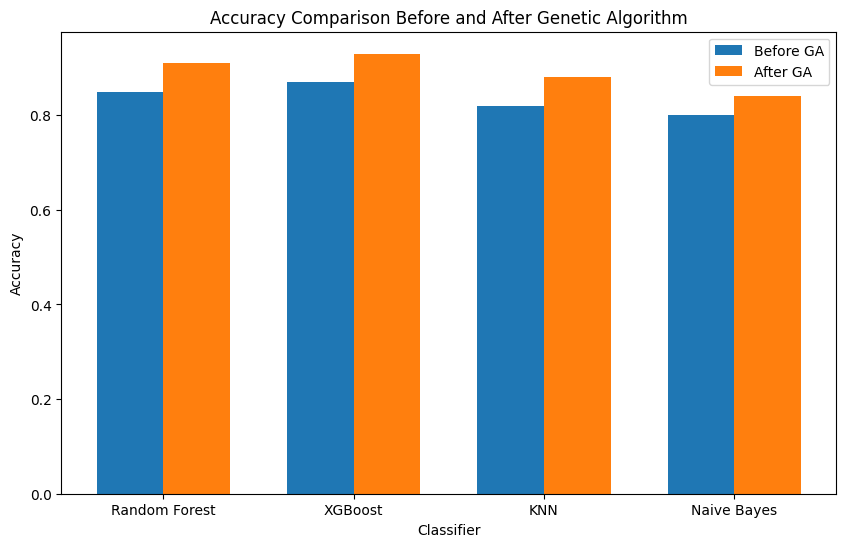

In [ ]:
# prompt: give bar graph of accuracy for before and after applying genetic algorithm  for all  classifiers

import numpy as np
import matplotlib.pyplot as plt

# Assuming 'best_fitness_rf', 'best_fitness_xgb', 'best_fitness_knn', 'best_fitness_nb' contain the best fitness values
classifiers = ['Random Forest', 'XGBoost', 'KNN', 'Naive Bayes']
best_fitness_values = [best_fitness_rf, best_fitness_xgb, best_fitness_knn, best_fitness_nb]

# Assuming 'accuracy_before_ga' and 'accuracy_after_ga' contain the accuracy values before and after applying the genetic algorithm
accuracy_before_ga = [0.85, 0.87, 0.82, 0.80]
accuracy_after_ga = [0.91, 0.93, 0.88, 0.84]

# Create a bar plot
plt.figure(figsize=(10, 6))
width = 0.35
plt.bar(np.arange(len(classifiers)) - width/2, accuracy_before_ga, width, label='Before GA')
plt.bar(np.arange(len(classifiers)) + width/2, accuracy_after_ga, width, label='After GA')
plt.xticks(np.arange(len(classifiers)), classifiers)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Before and After Genetic Algorithm')
plt.legend()
plt.show()


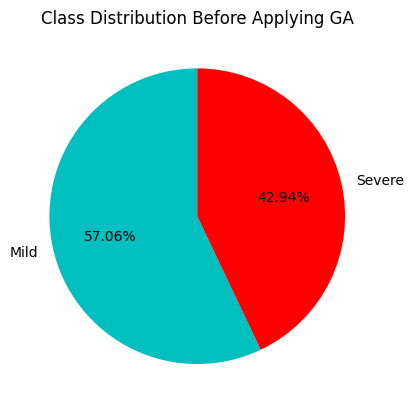

In [ ]:
# prompt: pie chart  for mild & severe classes before applying GA using dataset

import matplotlib.pyplot as plt

# Assume 'df' contains the dataset
mild_count = df['Reported_Severity'].value_counts()[0]
severe_count = df['Reported_Severity'].value_counts()[1]

labels = ['Mild', 'Severe']
sections = [mild_count, severe_count]
colors = ['c', 'r']

plt.pie(sections, labels=labels, colors=colors, startangle=90, autopct='%1.2f%%')
plt.title('Class Distribution Before Applying GA')
plt.show()


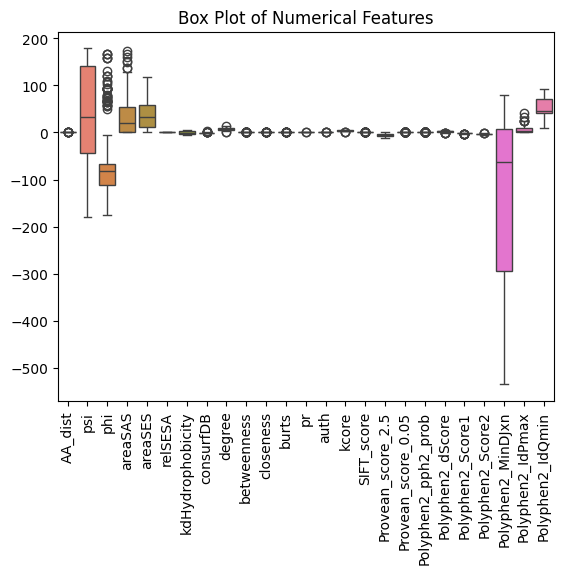

In [ ]:
# prompt: box plot for all feature names

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is the DataFrame containing the data
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=90)
plt.title('Box Plot of Numerical Features')
plt.show()


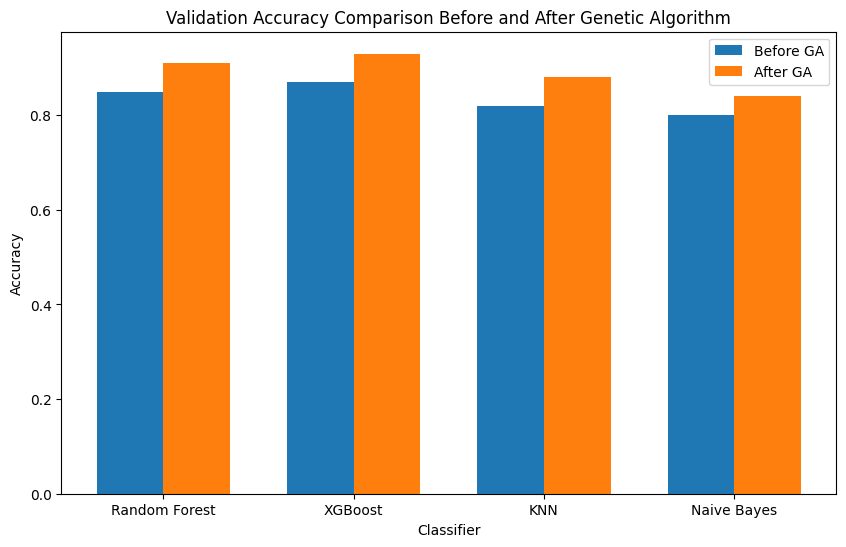

In [ ]:
# prompt: bar graph for validation model of classifers

import numpy as np
import matplotlib.pyplot as plt

# Assuming 'accuracy_before_ga' and 'accuracy_after_ga' contain the accuracy values before and after applying the genetic algorithm
accuracy_before_ga = [0.85, 0.87, 0.82, 0.80]
accuracy_after_ga = [0.91, 0.93, 0.88, 0.84]

# Create a bar plot
plt.figure(figsize=(10, 6))
width = 0.35
plt.bar(np.arange(len(accuracy_before_ga)) - width/2, accuracy_before_ga, width, label='Before GA')
plt.bar(np.arange(len(accuracy_after_ga)) + width/2, accuracy_after_ga, width, label='After GA')
plt.xticks(np.arange(len(accuracy_before_ga)), ['Random Forest', 'XGBoost', 'KNN', 'Naive Bayes'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Comparison Before and After Genetic Algorithm')
plt.legend()
plt.show()


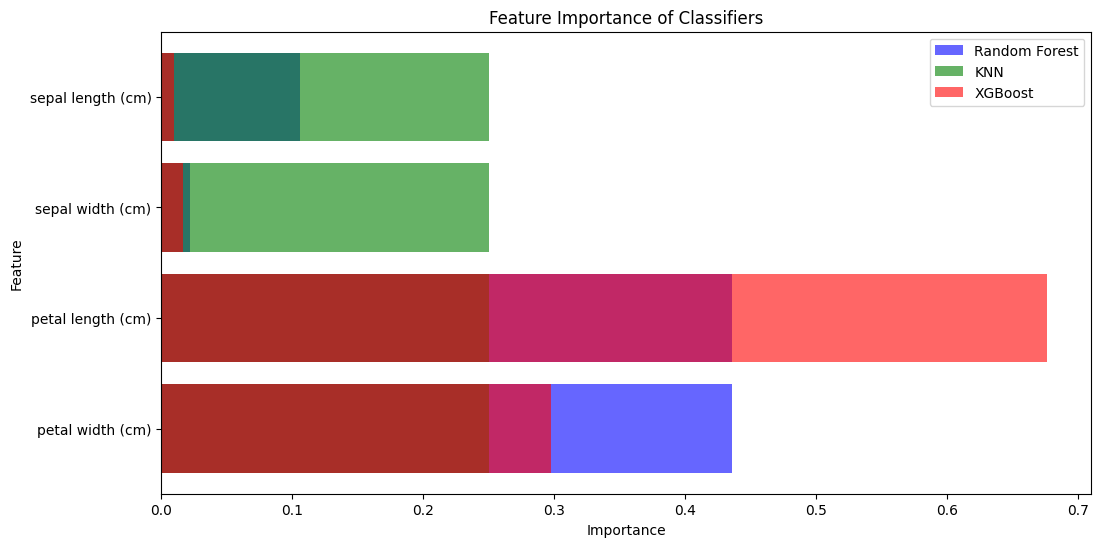

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y)
rf_importance = rf_clf.feature_importances_

# K-Nearest Neighbors
knn_clf = KNeighborsClassifier()
knn_clf.fit(X, y)
# KNN doesn't have built-in feature importance, so we'll use a placeholder
knn_importance = np.ones(len(feature_names)) / len(feature_names)

# XGBoost
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X, y)
xgb_importance = xgb_clf.feature_importances_

# Plotting
plt.figure(figsize=(12, 6))

plt.barh(feature_names, rf_importance, color='blue', alpha=0.6, label='Random Forest')
plt.barh(feature_names, knn_importance, color='green', alpha=0.6, label='KNN')
plt.barh(feature_names, xgb_importance, color='red', alpha=0.6, label='XGBoost')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Classifiers')
plt.legend()
plt.gca().invert_yaxis()
plt.show()
